### Import Programs

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import datetime as dt

import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from pandas.core import datetools

from sklearn.preprocessing import LabelEncoder

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, average_precision_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  


### Import Dataset from Excel file

These are the files produced in the previous Python notebook that performed cleansing and initial feature reduction.

In [7]:
X = pd.read_csv('data/HID_features.csv', index_col=0)
df_clean = pd.read_csv('data/df_clean.csv', index_col=0)

### Make more balanced datasets for the label ('IS_HID') - NO LONGER NEEDED!!

This dataset has a very big imbalanced class problem for the label attribute ('IS_HID' = a flag for whether the pharmacy is a current contract pharmacy of Macro Helix).   

        Positive labeled observations     177    xxxxx     now  841 (340B_Active)
        Negative labeled observations   4,669    xxxxx     now 4005

To address this, we undersampled the Negative class (picked a random 1,000 observations out of the 4,669 Negative observations) to make the training set more balanced.

In [8]:
X.columns

Index(['Auto_Ship_Ind', 'Interior_Decor_Signage_Available_Funds',
       'LMS_Enrolled', 'LMS_Available_Matching_Funds',
       'LMS_Used_Funds_Most_Recent_3_Months',
       'LMS_Used_Funds_Previous_3_Months', 'Open_Smart', 'PIP_Program',
       'PQS_Program', 'SCS_Program', 'Spar_Coverage_Ind',
       'Specialty_Solutions', 'Vaccine_Items', 'Vaccine_Starter',
       'Vaccine_Items_Count', 'Vaccine_Items_Sls_Amt', 'YPO', 'Tot_Sls_Amt',
       'DLC_Program_encoded', 'FEM_Program_encoded',
       'HM_Circular_Program_encoded', 'Internal_Decor', 'PQS_Enrolled_encoded',
       'ST_encoded', 'Pog_Code_Name_encoded', 'DC_Name_encoded',
       'Bus_Type_Desc_encoded', 'Region_encoded', 'PSAO_Expanded_encoded',
       'Chain_Name_encoded', 'Salesperson_encoded', 'AH_Program_encoded',
       'OTC_Front-end_Size_encoded', 'MRA_Program_Type_-_Active_AH_encoded',
       'Msa_Dma_encoded', 'Signage_Program_encoded'],
      dtype='object')

In [9]:
# MH = df_clean.loc[df_clean['IS_HID'] == 1]          - no longer need undersampling

In [10]:
# MH.head()       - no longer need undersampling

In [11]:
# NonMH = df_clean.loc[df_clean['IS_HID'] == 0]              - no longer need undersampling

In [12]:
# NonMH.head()      - no longer need undersampling

In [13]:
# Get a samller, random sample of Negative observations and add to Positive observations - to balance the classes

#NonMHsample1 = NonMH.sample(n=1000)
#dfsample1 = MH.append(NonMHsample1)

In [14]:
#dfsample1.head()

In [15]:
"""   ## - no longer need undersampling
X1 = dfsample1[['Auto_Ship_Ind', 'Interior_Decor_Signage_Available_Funds',
       'LMS_Enrolled', 'LMS_Available_Matching_Funds',
       'LMS_Used_Funds_Most_Recent_3_Months',
       'LMS_Used_Funds_Previous_3_Months', 'Open_Smart', 'PIP_Program',
       'PQS_Program', 'SCS_Program', 'Spar_Coverage_Ind',
       'Specialty_Solutions', 'Vaccine_Items', 'Vaccine_Starter',
       'Vaccine_Items_Count', 'Vaccine_Items_Sls_Amt', 'YPO', 'Tot_Sls_Amt',
       'DLC_Program_encoded', 'FEM_Program_encoded',
       'HM_Circular_Program_encoded', 'Internal_Decor', 'PQS_Enrolled_encoded',
       'ST_encoded', 'Pog_Code_Name_encoded', 'DC_Name_encoded',
       'Bus_Type_Desc_encoded', 'Region_encoded', 'PSAO_Expanded_encoded',
       'Chain_Name_encoded', 'Salesperson_encoded', 'AH_Program_encoded',
       'OTC_Front-end_Size_encoded', 'MRA_Program_Type_-_Active_AH_encoded',
       'Msa_Dma_encoded', 'Signage_Program_encoded',
       'Hospital_Associated_encoded']]
     
"""

"   ## - no longer need undersampling\nX1 = dfsample1[['Auto_Ship_Ind', 'Interior_Decor_Signage_Available_Funds',\n       'LMS_Enrolled', 'LMS_Available_Matching_Funds',\n       'LMS_Used_Funds_Most_Recent_3_Months',\n       'LMS_Used_Funds_Previous_3_Months', 'Open_Smart', 'PIP_Program',\n       'PQS_Program', 'SCS_Program', 'Spar_Coverage_Ind',\n       'Specialty_Solutions', 'Vaccine_Items', 'Vaccine_Starter',\n       'Vaccine_Items_Count', 'Vaccine_Items_Sls_Amt', 'YPO', 'Tot_Sls_Amt',\n       'DLC_Program_encoded', 'FEM_Program_encoded',\n       'HM_Circular_Program_encoded', 'Internal_Decor', 'PQS_Enrolled_encoded',\n       'ST_encoded', 'Pog_Code_Name_encoded', 'DC_Name_encoded',\n       'Bus_Type_Desc_encoded', 'Region_encoded', 'PSAO_Expanded_encoded',\n       'Chain_Name_encoded', 'Salesperson_encoded', 'AH_Program_encoded',\n       'OTC_Front-end_Size_encoded', 'MRA_Program_Type_-_Active_AH_encoded',\n       'Msa_Dma_encoded', 'Signage_Program_encoded',\n       'Hospital_Asso

In [16]:
X.head()

,Auto_Ship_Ind,Interior_Decor_Signage_Available_Funds,LMS_Enrolled,LMS_Available_Matching_Funds,LMS_Used_Funds_Most_Recent_3_Months,LMS_Used_Funds_Previous_3_Months,Open_Smart,PIP_Program,PQS_Program,SCS_Program,...,Bus_Type_Desc_encoded,Region_encoded,PSAO_Expanded_encoded,Chain_Name_encoded,Salesperson_encoded,AH_Program_encoded,OTC_Front-end_Size_encoded,MRA_Program_Type_-_Active_AH_encoded,Msa_Dma_encoded,Signage_Program_encoded
Account,,,,,,,,,,,,,,,,,,,,,
10491,1,1724.0,1,822.0,1,1,0,1,1,1,...,0,3,16,39,1,4,1,7,183,0
17475,1,0.0,1,0.0,1,1,0,0,1,1,...,0,3,0,39,1,0,3,3,190,0
19901,0,0.0,1,0.0,1,1,0,1,1,1,...,0,3,0,39,1,0,4,2,183,0
309745,0,2500.0,1,0.0,0,0,0,0,0,0,...,0,3,0,39,1,0,1,8,183,3
652229,0,0.0,1,340.0,1,0,0,0,1,0,...,0,3,0,38,1,0,0,8,183,0


In [17]:
y = df_clean['340B_Active']

In [18]:
# y_small = dfsample1['IS_HID']      - no longer need undersampling

### Try some models and look at performance metrics and important features

In [19]:
# Split the data into train-test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
# Random Forest

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.feature_importances_
pred_rf = rf.predict(X_test) 
rf_score_acc = np.mean(cross_val_score(rf, X_train, y_train, cv=5))
rf_score_recall = recall_score(y_test, pred_rf, average='weighted')
rf_score_avgprecision = average_precision_score(y_test, pred_rf)

print("Accuracy Score cross-validated: ", rf_score_acc)
print("Recall Score: ", rf_score_recall)
print("Precision Score average:  ", rf_score_avgprecision)

Accuracy Score cross-validated:  0.833943182367
Recall Score:  0.835
Precision Score average:   0.24965609937


The most important measure for this business problem is Recall.  This is because Recall captures how many actual Positives the model finds.  In other words, does the model correctly predict current contract pharmacies of Macro Helix?   We want a model that can recognize an actual contract pharmacy.  Precision is not as important, as this captures how many the model labels as positive, compared to how many of those actually are positive; since we know that most of the pharmacies are not currently contract pharmacies, this measure is not very useful to the problem.  Similarly, Accuracy/R2 is not as important because since most in the dataset are negative, the model could merely predict all are negative and have a great Accuracy/R2 score -- not very meaningful.

In [21]:
feature_imp_rf = pd.DataFrame({'Feature Importance' : rf.feature_importances_}, index=X.columns)
print(feature_imp_rf)

                                        Feature Importance
Auto_Ship_Ind                                     0.014734
Interior_Decor_Signage_Available_Funds            0.050316
LMS_Enrolled                                      0.007184
LMS_Available_Matching_Funds                      0.058091
LMS_Used_Funds_Most_Recent_3_Months               0.009979
LMS_Used_Funds_Previous_3_Months                  0.017365
Open_Smart                                        0.006544
PIP_Program                                       0.013194
PQS_Program                                       0.009660
SCS_Program                                       0.012226
Spar_Coverage_Ind                                 0.011928
Specialty_Solutions                               0.004152
Vaccine_Items                                     0.008615
Vaccine_Starter                                   0.007636
Vaccine_Items_Count                               0.027815
Vaccine_Items_Sls_Amt                             0.0444

In [22]:
# Decision Tree

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt.feature_importances_
pred_dt = dt.predict(X_test) 
dt_score_acc = np.mean(cross_val_score(dt, X_train, y_train, cv=5))
dt_score_recall = recall_score(y_test, pred_dt, average='weighted')
dt_score_avgprecision = average_precision_score(y_test, pred_dt)

print("Accuracy Score cross-validated: ", dt_score_acc)
print("Recall Score: ", dt_score_recall)
print("Precision Score average:  ", dt_score_avgprecision)

Accuracy Score cross-validated:  0.761246183404
Recall Score:  0.769375
Precision Score average:   0.248582357878


In [23]:
feature_imp_dt = pd.DataFrame({'Feature Importance' : dt.feature_importances_}, index=X.columns)
print(feature_imp_dt)

                                        Feature Importance
Auto_Ship_Ind                                     0.010793
Interior_Decor_Signage_Available_Funds            0.049919
LMS_Enrolled                                      0.006427
LMS_Available_Matching_Funds                      0.071602
LMS_Used_Funds_Most_Recent_3_Months               0.008457
LMS_Used_Funds_Previous_3_Months                  0.016178
Open_Smart                                        0.005875
PIP_Program                                       0.006011
PQS_Program                                       0.000197
SCS_Program                                       0.014995
Spar_Coverage_Ind                                 0.005144
Specialty_Solutions                               0.003178
Vaccine_Items                                     0.007245
Vaccine_Starter                                   0.012881
Vaccine_Items_Count                               0.014176
Vaccine_Items_Sls_Amt                             0.0491

In [24]:
# Gradient Boosting

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb.feature_importances_
pred_gb = gb.predict(X_test) 
gb_score_acc = np.mean(cross_val_score(gb, X_train, y_train, cv=5))
gb_score_recall = recall_score(y_test, pred_gb, average='weighted')
gb_score_avgprecision = average_precision_score(y_test, pred_gb)

print("Accuracy Score cross-validated: ", gb_score_acc)
print("Recall Score: ", gb_score_recall)
print("Precision Score average:  ", gb_score_avgprecision)

Accuracy Score cross-validated:  0.832102239255
Recall Score:  0.831875
Precision Score average:   0.234700528202


In [25]:
feature_imp_gb = pd.DataFrame({'Feature Importance' : gb.feature_importances_}, index=X.columns)
print(feature_imp_gb)

                                        Feature Importance
Auto_Ship_Ind                                     0.001931
Interior_Decor_Signage_Available_Funds            0.009052
LMS_Enrolled                                      0.002391
LMS_Available_Matching_Funds                      0.111518
LMS_Used_Funds_Most_Recent_3_Months               0.000000
LMS_Used_Funds_Previous_3_Months                  0.003831
Open_Smart                                        0.000054
PIP_Program                                       0.014256
PQS_Program                                       0.003012
SCS_Program                                       0.008036
Spar_Coverage_Ind                                 0.000095
Specialty_Solutions                               0.010256
Vaccine_Items                                     0.002622
Vaccine_Starter                                   0.004761
Vaccine_Items_Count                               0.009087
Vaccine_Items_Sls_Amt                             0.0384

In [26]:
# show which features are most important

def plot_feature_importance(model, df):
    cols = []
    for col in df.columns:
        cols.append(col)

    feature_importances = pd.DataFrame({'Feature Importance' : model.feature_importances_}, index=cols)
    feature_importances = feature_importances.sort_values(by='Feature Importance')
    feature_importances.plot(kind='barh', color='r', figsize=(6,6))
    plt.title('Feature Importance', fontsize=18)
    plt.tight_layout()
    plt.savefig('figures/feat_import.png', dpi=300)

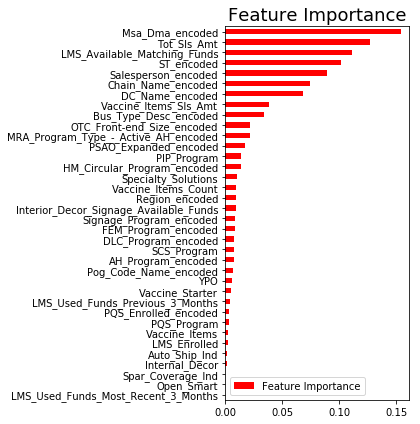

In [27]:
plot_feature_importance(gb, X_test)

### Reduce the dimensions even further, based on Feature Importance

Pick the top features to model, making the model simpler but still performing as well.

In [28]:
# XR = X[['DC_Name_encoded','Tot_Sls_Amt', 'Msa_Dma_encoded',
#                 'Salesperson_encoded', 'ST_encoded',
#                 'Chain_Name_encoded','LMS_Available_Matching_Funds']]

In [29]:
XR = X[['DC_Name_encoded','Tot_Sls_Amt', 'Msa_Dma_encoded',
                'Salesperson_encoded', 'ST_encoded',
                'Chain_Name_encoded','LMS_Available_Matching_Funds']]

In [30]:
XR_train = X_train[['DC_Name_encoded', 'Tot_Sls_Amt', 'Msa_Dma_encoded',
                'Salesperson_encoded', 'ST_encoded',
                'Chain_Name_encoded','LMS_Available_Matching_Funds']]

XR_test = X_test[['DC_Name_encoded', 'Tot_Sls_Amt', 'Msa_Dma_encoded',
                'Salesperson_encoded', 'ST_encoded',
                'Chain_Name_encoded','LMS_Available_Matching_Funds']]

In [31]:
# # Gradient Boosting with reduced features

# gbr = GradientBoostingClassifier()
# gbr.fit(XR_train, y_train)
# gbr.feature_importances_
# pred_gbr = gbr.predict(XR_test) 
# gbr_score_acc = np.mean(cross_val_score(gbr, XR_train, y_train, cv=5))
# gbr_score_recall = recall_score(y_test, pred_gbr, average='weighted')
# gbr_score_avgprecision = average_precision_score(y_test, pred_gbr)

# print("Accuracy Score cross-validated: ", gbr_score_acc)
# print("Recall Score: ", gbr_score_recall)
# print("Precision Score average:  ", gbr_score_avgprecision)

In [32]:
# Gradient Boosting with reduced features

gbr = GradientBoostingClassifier()
gbr.fit(XR_train, y_train)
gbr.feature_importances_
pred_gbr = gbr.predict(XR_test) 
gbr_score_acc = np.mean(cross_val_score(gbr, XR_test, y_test, cv=5))
gbr_score_recall = recall_score(y_test, pred_gbr, average='weighted')
gbr_score_avgprecision = average_precision_score(y_test, pred_gbr)

print("Accuracy Score cross-validated: ", gbr_score_acc)
print("Recall Score: ", gbr_score_recall)
print("Precision Score average:  ", gbr_score_avgprecision)

Accuracy Score cross-validated:  0.820622357152
Recall Score:  0.83625
Precision Score average:   0.242491875301


In [33]:
feature_imp_gbr = pd.DataFrame({'Feature Importance' : gbr.feature_importances_}, index=XR.columns)
print(feature_imp_gbr)

                              Feature Importance
DC_Name_encoded                         0.077598
Tot_Sls_Amt                             0.225369
Msa_Dma_encoded                         0.210621
Salesperson_encoded                     0.137675
ST_encoded                              0.113251
Chain_Name_encoded                      0.082539
LMS_Available_Matching_Funds            0.152947


Save processed data to files for review

In [35]:
X.to_csv('data/HID_all_obs.csv')
#X1.to_csv('data/HID_undersampled_obs.csv')  - no longer need undersampling
XR.to_csv('data/HID_reduced_features.csv')
#dfsample1.to_csv('data/HID_undersampled_w_label.csv') - no longer need undersampling

### GridSearch to optimize the model, using the reduced feature set

How can we optimized the model that seems to perform the best?   We try many parameters via GridSearch.

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
gbr_params = dict(learning_rate=np.arange(0.1, 0.5, 0.1),
                        min_samples_split=np.arange(2,5,1),
                        max_depth=np.arange(1, 7, 1),
                        max_features=np.array([1, 2, 3, 4, 5, 6, 7, None, 'auto', 'sqrt', 'log2']),
                        n_estimators=np.arange(60, 140, 10))

In [ ]:
gs_gbr = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=gbr_params)

In [ ]:
gs_gbr.fit(XR_train, y_train)

In [ ]:
gs_gbr.best_params_

In [ ]:
gs_gbr.best_score_

In [ ]:
gs_gbr.best_estimator_

In [38]:
best_model = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.40000000000000002, loss='deviance',
              max_depth=3, max_features='log2', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=3,
              min_weight_fraction_leaf=0.0, n_estimators=70,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
best_model.fit(XR_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.4, loss='deviance', max_depth=3,
              max_features='log2', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=3,
              min_weight_fraction_leaf=0.0, n_estimators=70,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [39]:
best_model.feature_importances_
pred_best_model = best_model.predict(XR_test) 
best_model_score_acc = np.mean(cross_val_score(best_model, XR_train, y_train, cv=5))
best_model_score_recall = recall_score(y_test, pred_best_model, average='weighted')
best_model_score_avgprecision = average_precision_score(y_test, pred_best_model)

print("Accuracy Score cross-validated: ", best_model_score_acc)
print("Recall Score: ", best_model_score_recall)
print("Precision Score average:  ", best_model_score_avgprecision)

Accuracy Score cross-validated:  0.831474046564
Recall Score:  0.82625
Precision Score average:   0.256975532477


### Run the model (reduced feature set) on ALL observations

We trained and fitted the model with a reduced set of observations (to address the class imbalance for the label), so now we want to try the model on all observations, to learn which pharmacies it predicts as contract pharmacies for Macro Helix.

In [40]:
XR_all_obs = X[['DC_Name_encoded', 'Tot_Sls_Amt', 'Msa_Dma_encoded',
                'Salesperson_encoded', 'ST_encoded',
                'Chain_Name_encoded','LMS_Available_Matching_Funds']] 

In [41]:
pred_best_model_all_obs = best_model.predict(XR_all_obs)

In [42]:
best_model_all_obs_score_acc = np.mean(cross_val_score(best_model, XR, y, cv=5))
# best_model_all_obs_score_recall = recall_score(y, pred_best_model_all_obs, average='weighted')
best_model_all_obs_score_recall = recall_score(y, pred_best_model_all_obs) 
best_model_all_obs_score_avgprecision = average_precision_score(y, pred_best_model_all_obs)

print("Accuracy Score cross-validated: ", best_model_all_obs_score_acc)
print("Recall Score: ", best_model_all_obs_score_recall)
print("Precision Score average:  ", best_model_all_obs_score_avgprecision)

Accuracy Score cross-validated:  0.181201153277
Recall Score:  0.373365041617
Precision Score average:   0.383308320335


Recall score is improved and is GREAT!

### Put Actual 340B and Predicted 340B into final dataset

In [35]:
df_clean['Actual_340B'] = df_clean['340B_Active'] 

In [60]:
q = pred_best_model_all_obs

In [62]:
unique, counts = np.unique(q, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 4431]
 [   1  415]]


In [36]:
df_clean['Predicted_340B'] = pred_best_model_all_obs           

In [37]:
df_clean.head()

,Zip,Hm_Start_Dt,Channel_Type_Cd,Auto_Ship_Ind,Internal_Decor,Interior_Decor_Signage_Available_Funds,LMS_Enrolled,LMS_Available_Matching_Funds,LMS_Used_Funds_Most_Recent_3_Months,LMS_Used_Funds_Previous_3_Months,...,Salesperson_encoded,AH_Program_encoded,OTC_Front-end_Size_encoded,MRA_Program_Type_-_Active_AH_encoded,Msa_Dma_encoded,Signage_Program_encoded,3rd_Party_Vendor_encoded,Hospital_Associated_encoded,Actual_340B,Predicted_340B
Account,,,,,,,,,,,,,,,,,,,,,
10491,97463,732524,30,1,1,1724.0,1,822.0,1,1,...,1,4,1,7,183,0,18,15,0,0
17475,97630,732687,30,1,1,0.0,1,0.0,1,1,...,1,0,3,3,190,0,18,15,0,0
19901,97471,732616,30,0,1,0.0,1,0.0,1,1,...,1,0,4,2,183,0,18,15,0,0
309745,97467,735998,30,0,0,2500.0,1,0.0,0,0,...,1,0,1,8,183,3,18,15,0,0
652229,97370,734702,30,0,1,0.0,1,340.0,1,0,...,1,0,0,8,183,0,18,15,0,0


Save to file for the business to review predicted contract pharmacies.

In [40]:
df_clean.to_csv('data/340B_predictions.csv')

In [41]:
len(df_clean[df_clean['Predicted_340B']==1])

415

In [42]:
df_clean['Predicted_340B'].unique()
df_clean['Predicted_340B'].value_counts()

0    4431
1     415
Name: Predicted_340B, dtype: int64

In [43]:
XR.shape

(4846, 7)

In [44]:
X.shape

(4846, 36)

In [45]:
y.shape

(4846,)

In [46]:
XR_all_obs.shape

(4846, 7)